In [1]:
# IMPORT LABRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [6]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE

from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras import regularizers

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score

In [3]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded["creditcard.csv"]))
df.head()

Saving creditcard.csv to creditcard.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Fraudulent Cases: 492
Valid Transactions: 284315
Proportion of Fraudulent Cases: 0.001727485630620034


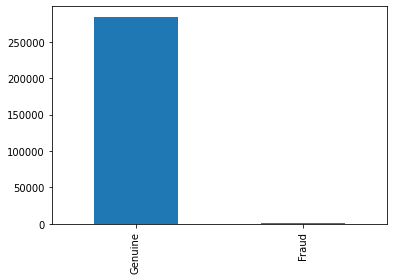

In [ ]:
# check for relative proportion 
print("Fraudulent Cases: " + str(len(df[df["Class"] == 1])))
print("Valid Transactions: " + str(len(df[df["Class"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(df[df["Class"] == 1])/ df.shape[0]))

# To see how small are the number of Fraud transactions
data_p = df.copy()
data_p[" "] = np.where(data_p["Class"] == 1 ,  "Fraud", "Genuine")

# plot a pie chart
data_p[" "].value_counts().plot(kind="bar")

In [5]:
print("Min Amount in a Fraudulent Transaction: " + str(df[df["Class"] == 1]["Amount"].min()))
print("Min Amount in a Valid Transaction: " + str(df[df["Class"] == 0]["Amount"].min()))
print("Average Amount in a Fraudulent Transaction: " + str(df[df["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Valid Transaction: " + str(df[df["Class"] == 0]["Amount"].mean()))
print("Max Amount in a Fraudulent Transaction: " + str(df[df["Class"] == 1]["Amount"].max()))
print("Max Amount in a Valid Transaction: " + str(df[df["Class"] == 0]["Amount"].max()))

Min Amount in a Fraudulent Transaction: 0.0
Min Amount in a Valid Transaction: 0.0
Average Amount in a Fraudulent Transaction: 122.21132113821139
Average Amount in a Valid Transaction: 88.29102242231328
Max Amount in a Fraudulent Transaction: 2125.87
Max Amount in a Valid Transaction: 25691.16


<function matplotlib.pyplot.show>

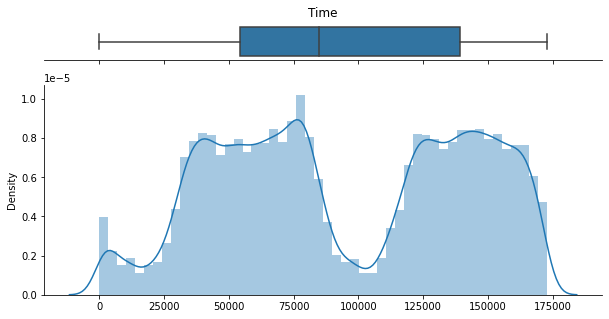

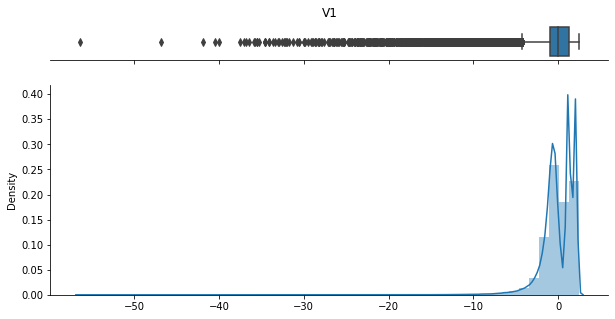

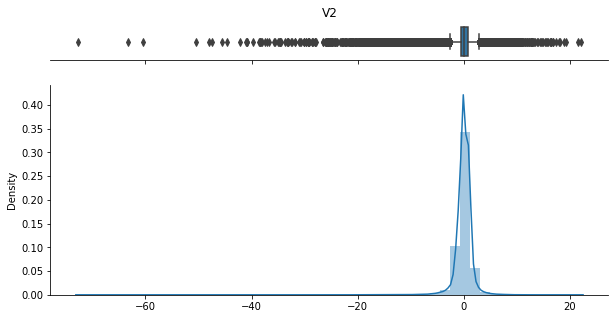

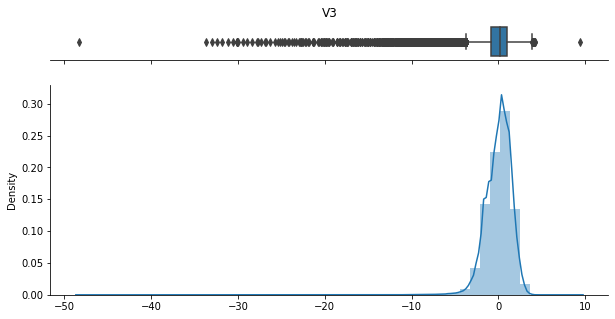

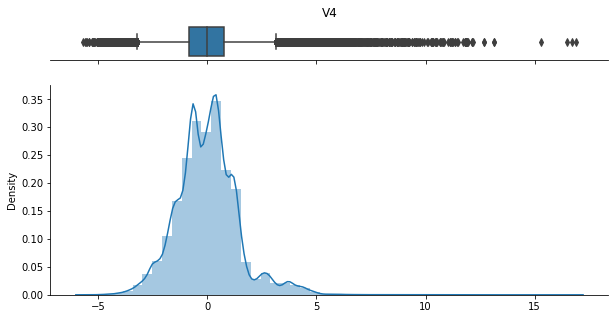

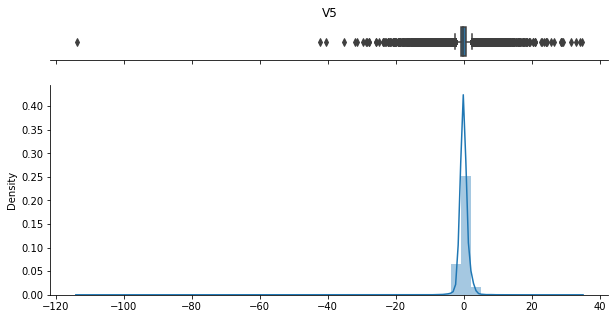

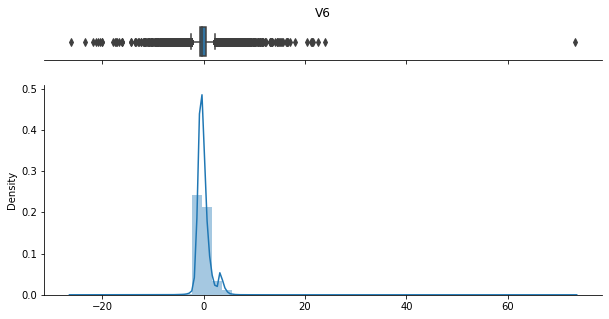

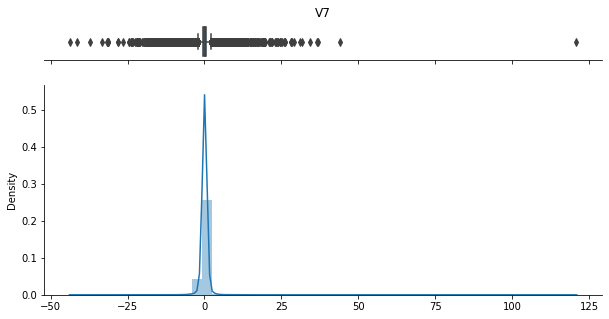

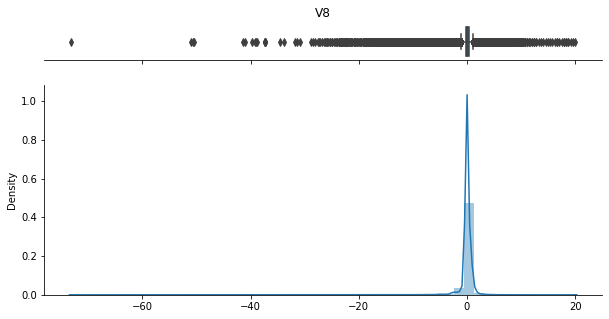

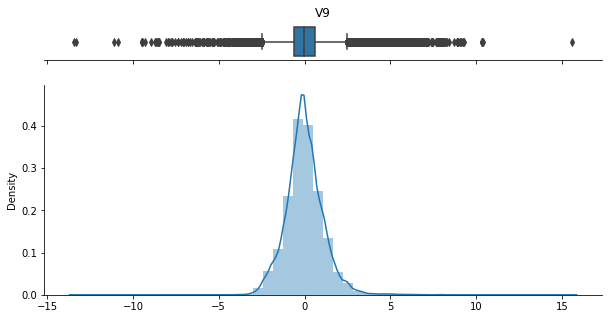

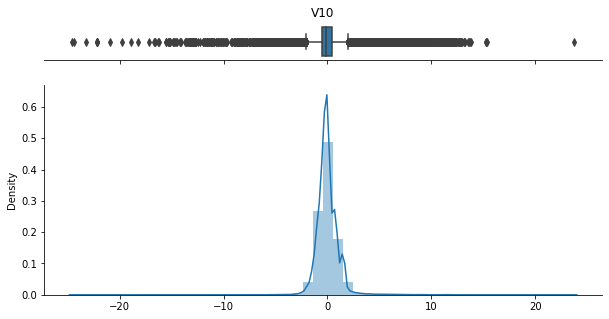

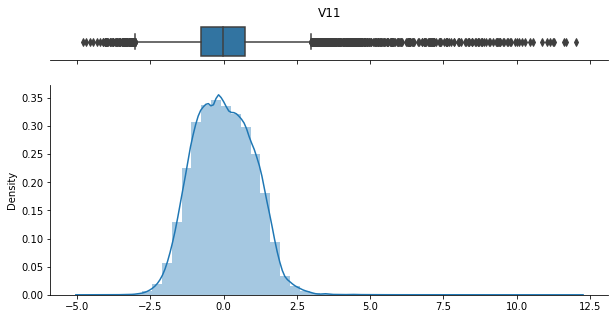

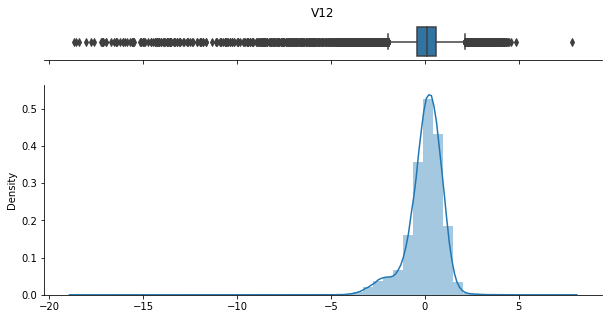

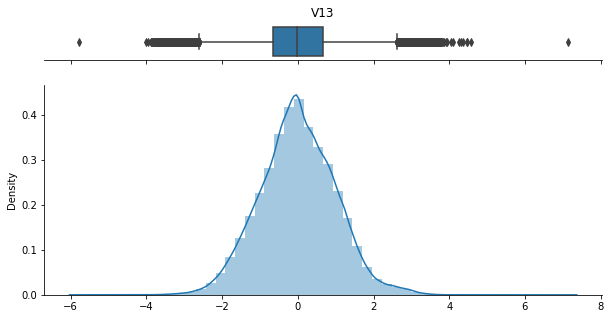

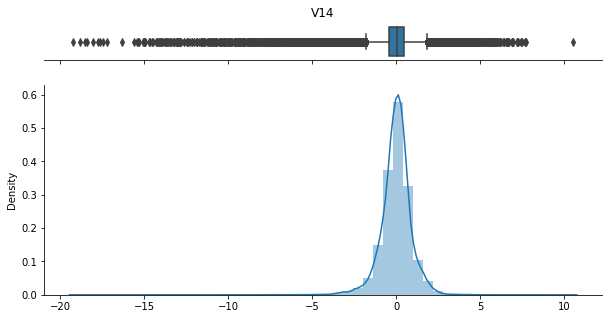

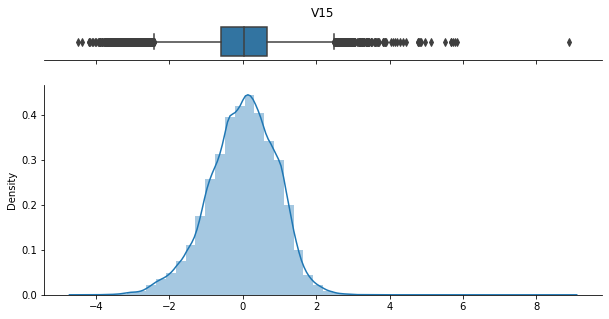

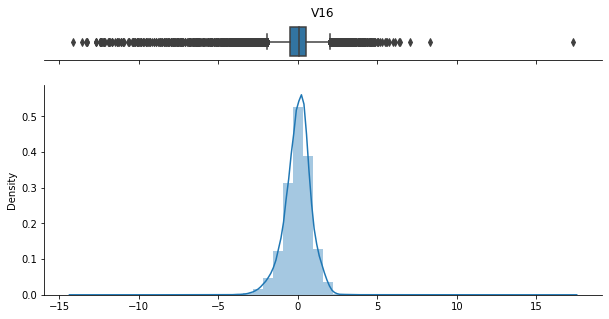

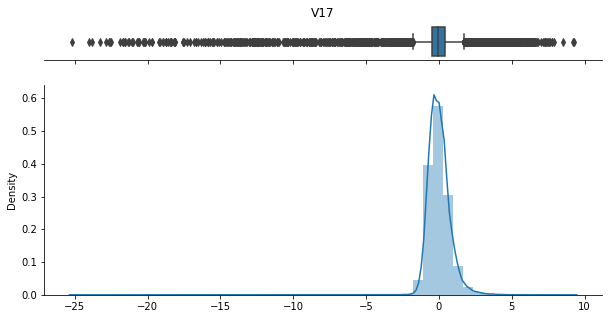

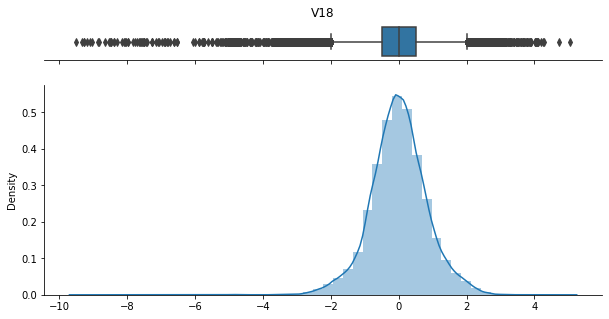

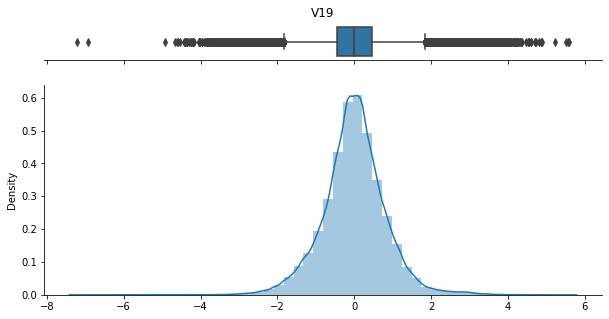

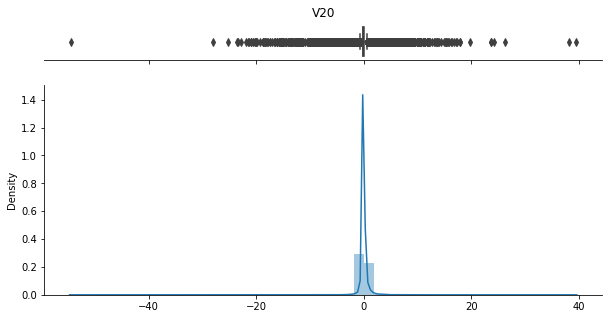

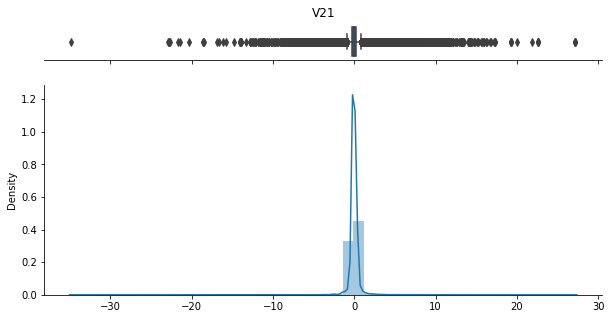

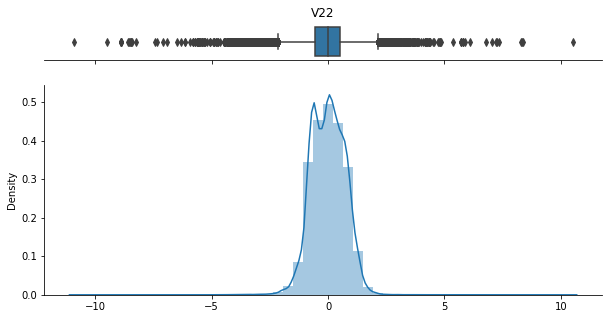

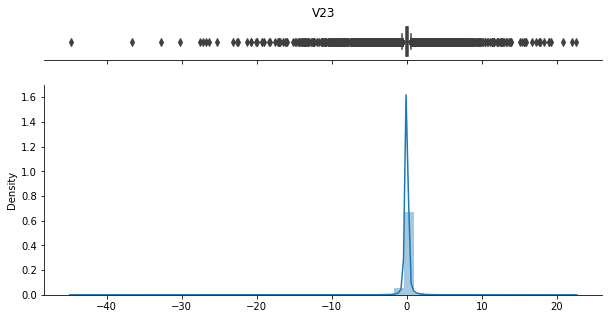

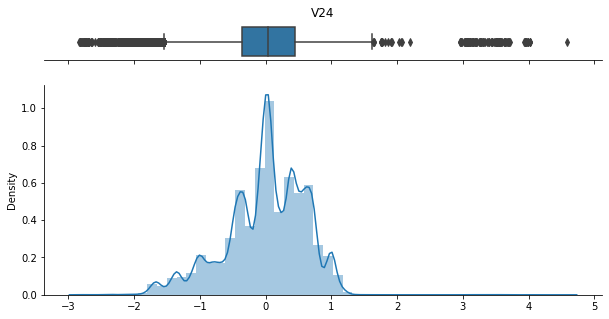

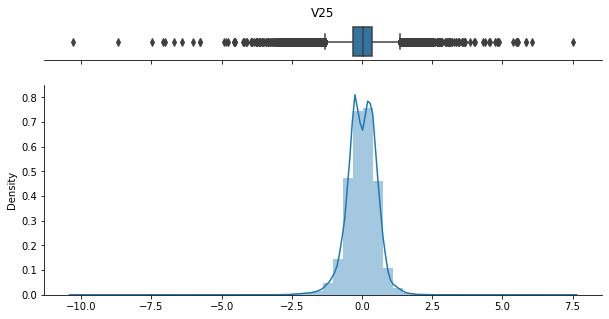

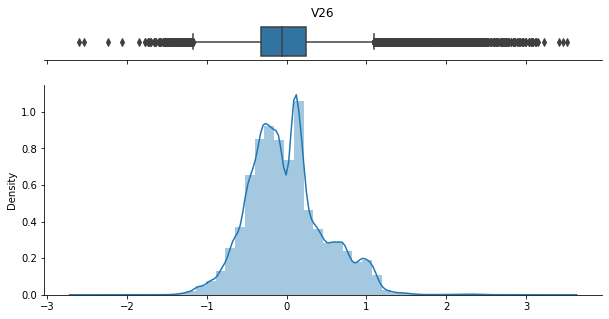

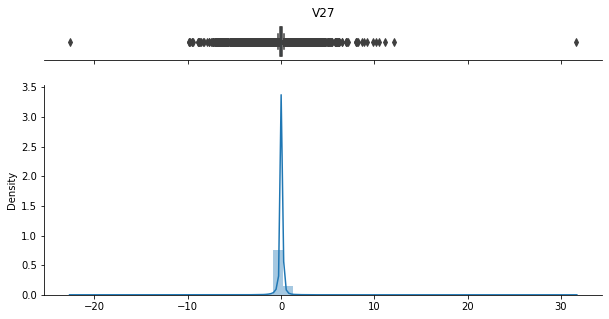

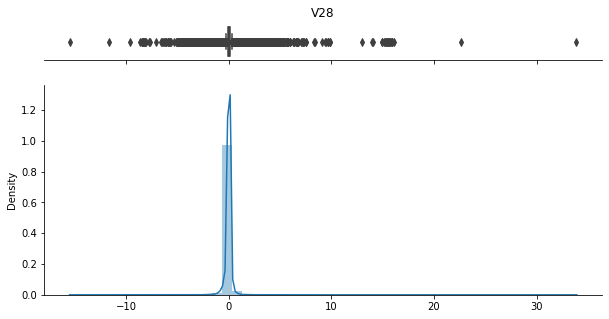

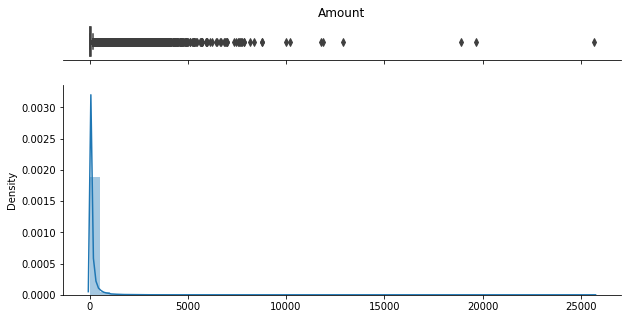

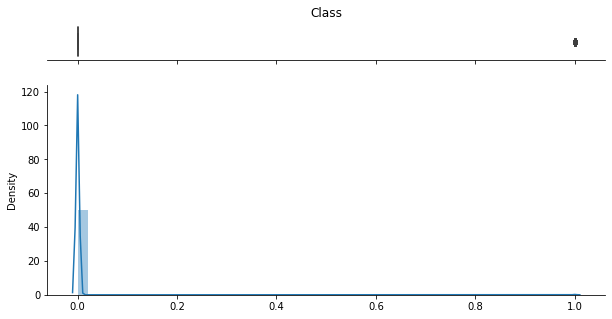

In [ ]:
#--- check for Outliers
for c in df.columns: 
    fig, ax = plt.subplots(2, figsize=(10,5), sharex=True, 
                         gridspec_kw = {'height_ratios': (0.15, 0.85)})
    ax_box = ax[0]
    ax_box = sns.boxplot(df[c], ax=ax_box)
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)

    ax_hist = ax[1]
    ax_hist = sns.distplot(df[c], ax=ax_hist)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show

In [8]:
# Find the IQR for all the feature variables
quartile1 = df.quantile(0.25)
quartile3 = df.quantile(0.75)

IQR = quartile3 - quartile1
print(IQR)

Time      85119.000000
V1            2.236015
V2            1.402274
V3            1.917560
V4            1.591981
V5            1.303524
V6            1.166861
V7            1.124512
V8            0.535976
V9            1.240237
V10           0.989349
V11           1.502088
V12           1.023810
V13           1.311044
V14           0.918724
V15           1.231705
V16           0.991333
V17           0.883423
V18           0.999657
V19           0.915248
V20           0.344762
V21           0.414772
V22           1.070904
V23           0.309488
V24           0.794113
V25           0.667861
V26           0.567936
V27           0.161885
V28           0.131240
Amount       71.565000
Class         0.000000
dtype: float64


In [9]:
# Remove the outliers 
constant = 3
datavalid = df[~((df < (quartile1 - constant * IQR)) |(df > (quartile3 + constant * IQR))).any(axis=1)]
deletedrows = df.shape[0] - datavalid.shape[0]
print("We have removed " + str(deletedrows) + " rows from the data as outliers")

We have removed 53376 rows from the data as outliers


In [ ]:
min(df.Amount),max(df.Amount)

(0.0, 25691.16)

In [10]:
df.drop(['Time'], axis=1, inplace=True)

In [ ]:
df.shape

(284807, 30)

In [11]:
#remove any duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#recheck shape again
df.shape

(275663, 30)

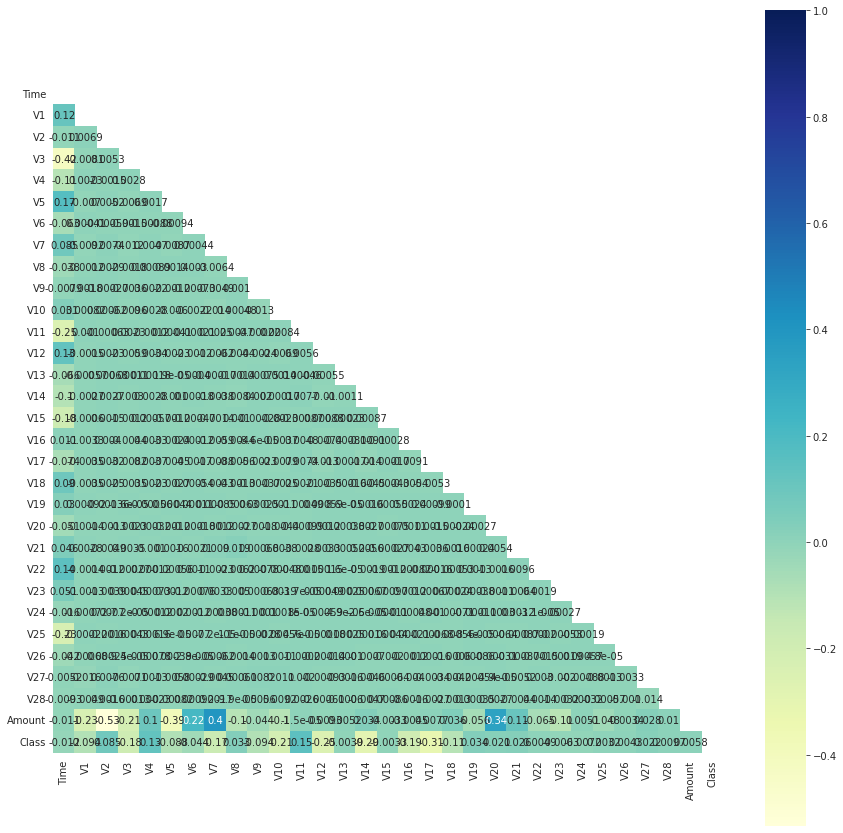

In [ ]:
# Nice correlation  
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, annot=True, cmap="YlGnBu")

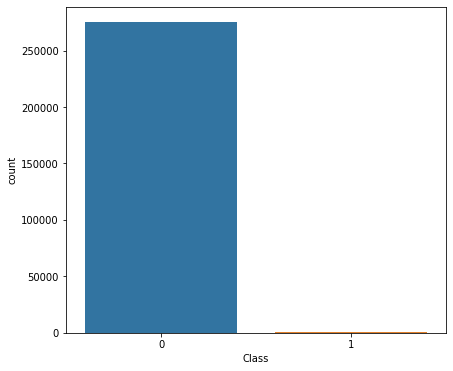

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=df['Class'])
ax.set_title('Before Upsampling')

Text(0.5, 1.0, 'After Resampling')

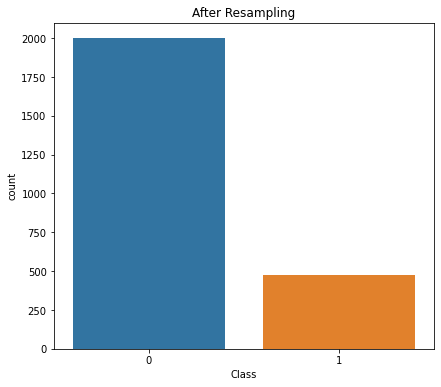

In [13]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['Class']==1)] 
df_minority = df[(df['Class']==0)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=2000 , # to match majority class
                                 random_state=42)  # reproducible results
                                 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
plt.figure(figsize = (15, 6))
ax=plt.subplot(1, 2, 1)
sns.countplot(x=df_upsampled['Class'])
ax.set_title('After Resampling')

observed in our data 28 features are transformed versions of PCA but the Amount is the original one. And, while checking the minimum and maximum is in the amount. In this case, it is a good practice to scale this variable. We can use a standard scaler to make it fix

Train & Test Split

In [14]:
target_col = 'Class'
feature_cols = [c for c in df.columns if c != target_col]

In [15]:
X = df_upsampled[feature_cols] # Predictors
y = df_upsampled[target_col]   # Target

In [16]:
p = TSNE(n_components=2, random_state=24).fit_transform(X)
p

array([[  7.582447 ,  51.38542  ],
       [-24.831234 ,   3.9762654],
       [ -3.1466572, -64.47828  ],
       ...,
       [ -6.856964 , -21.576128 ],
       [ 25.88977  , -49.63649  ],
       [-49.236027 , -16.894405 ]], dtype=float32)

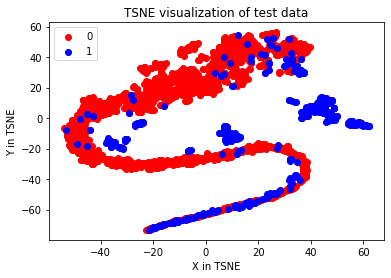

In [17]:
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x=p[y==cl,0], y=p[y==cl,1], c= color_map[idx], label =cl)
plt.xlabel('X in TSNE')
plt.ylabel('Y in TSNE')
plt.legend(loc='upper left')
plt.title('TSNE visualization of test data')
plt.show()

before encoding the data to extract hidden information, we have to scale it first

In [18]:
#--- Normalisation the Data ---Consider using MinMax instead of Standard
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xss = sc.fit_transform(X)

In [19]:
x_norm , x_fraud = Xss[y==0], Xss[y==1]

In [ ]:
Xss

array([[-0.67725216, -0.04219583,  1.66551703, ...,  0.32805122,
        -0.06600571,  0.23316933],
       [ 0.62960567,  0.16109128,  0.09350345, ..., -0.0271742 ,
         0.04154702, -0.34709201],
       [-0.67650796, -0.80235563,  1.1593019 , ..., -0.14273141,
        -0.18234119,  1.13770248],
       ...,
       [ 1.00230782, -0.17923088, -2.17252573, ...,  0.00631411,
        -0.08256307, -0.08964127],
       [-0.10395822,  0.31963418,  0.44907056, ...,  0.26640293,
         0.31152789, -0.31822309],
       [-0.25400671, -0.11234227,  0.44961923, ..., -0.01080671,
         0.03831461,  0.49926889]])

In [20]:
model = Sequential()

In [21]:
# Add the first hidden layer
model.add(Dense(Xss.shape[1], activation = 'tanh'))
# Add the second hidden layer
model.add(Dense(100, activation = 'tanh'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(100, activation = 'tanh'))
model.add(Dense(100, activation = 'tanh'))
# Add the output layer
model.add(Dense(Xss.shape[1], activation = 'relu'))

In [22]:
model.compile(optimizer='adadelta', loss='mse')

In [23]:
# Fit the model
model.fit(x_norm, x_norm, epochs=10, batch_size=256, shuffle = True, validation_split= 0.2)

Epoch 1/10
7/7 [==============================] - 1s 34ms/step - loss: 0.5023 - val_loss: 0.4902
Epoch 2/10
7/7 [==============================] - 0s 7ms/step - loss: 0.5022 - val_loss: 0.4901
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 0.5021 - val_loss: 0.4900
Epoch 4/10
7/7 [==============================] - 0s 9ms/step - loss: 0.5019 - val_loss: 0.4898
Epoch 5/10
7/7 [==============================] - 0s 7ms/step - loss: 0.5018 - val_loss: 0.4897
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 0.5017 - val_loss: 0.4896
Epoch 7/10
7/7 [==============================] - 0s 8ms/step - loss: 0.5015 - val_loss: 0.4894
Epoch 8/10
7/7 [==============================] - 0s 8ms/step - loss: 0.5014 - val_loss: 0.4893
Epoch 9/10
7/7 [==============================] - 0s 9ms/step - loss: 0.5013 - val_loss: 0.4892
Epoch 10/10
7/7 [==============================] - 0s 8ms/step - loss: 0.5011 - val_loss: 0.4890


In [24]:
encoder = Sequential()
encoder.add(model.layers[0])
encoder.add(model.layers[1])
encoder.add(model.layers[2])

In [25]:
norm_encorder = encoder.predict(x_norm)
fraud_encorder = encoder.predict(x_fraud)

In [26]:
rep_x = np.append(norm_encorder, fraud_encorder, axis=0)
y_n = np.zeros(norm_encorder.shape[0])
y_f = np.ones(fraud_encorder.shape[0])
rep_y = np.append(y_n, y_f)

In [27]:
p = TSNE(n_components=2, random_state=24).fit_transform(rep_x)

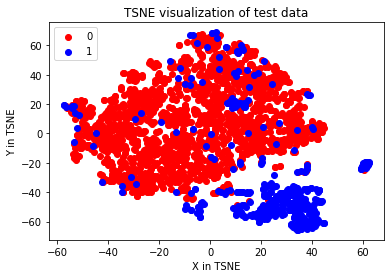

In [28]:
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
  plt.scatter(x=p[y==cl,0], y=p[y==cl,1], c= color_map[idx], label =cl)
plt.xlabel('X in TSNE')
plt.ylabel('Y in TSNE')
plt.legend(loc='upper left')
plt.title('TSNE visualization of test data')
plt.show()

In [29]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(rep_x, rep_y, test_size=0.20, random_state=77)

In [30]:
X_train.shape

(1978, 50)

In [31]:
y_train.shape

(1978,)

In [32]:
DT_Model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
DT_Model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [42]:
#--- Show Summary Report --- 
def show_summary_report(actual, prediction):
    if isinstance(actual, pd.Series):
       actual = actual.values.astype(int)
    prediction = prediction.astype(float)	   
    prediction_int = prediction.astype(int) 
    
    #--- Accuracy score ---
    print('Accuracy : %.4f [TP / N]      Best: 1, Worst: 0' % accuracy_score(actual, prediction_int))
    
    #--- Precision score ---
    msg = '           Proportion of Predicted Labels that match the True Labels.'
    print(msg)
    print('Precision: %.4f [TP / (TP + FP)] Best:1, Worst: 0' % precision_score(actual, prediction_int))
    
    #--- Recall score ---
    msg = '           Not to Label a negative sample as positive.'
    print(msg)
    print('Recall   : %.4f [TP / (TP + FN)] Best:1, Worst: 0' % recall_score(actual, prediction_int))

    #--- ROC AUC ---
    msg = '           Find all the positive samples.'
    print(msg)
    print('ROC AUC  : %.4f [TP / (TP + FN)] Best:1, Worst: < 0.5' % roc_auc_score(actual, prediction))
    
    print('=', 80)
    print('TP: True Positives, FP: False Positives,')
    print('TN: True Negatives, FN: False Negatives,')
    print('N: Number of Samples')
    
    f1_        = f1_score(actual, prediction, zero_division=1) 
    print('F1 Score : %.4f [F1 Score = 2 X (Precision X Recall) / (Precision + Recall)]        Best: 1, Worst: 0' % f1_)

    # Confusion Matrix
    CM = confusion_matrix(actual, prediction_int)
    
    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    
    # Compute ROC Curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)
    
    #--- Plot Graph ---
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)
    
    # Confusion Matrixs
    sns.heatmap(CM.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues', ax=ax[0])
    
    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True Label')
    ax[0].set_ylabel('Predicted Label')
    
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post') 
    ax[1].fill_between(recall, precision, color='b', alpha=0.2, **step_kwargs)
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-Class Precision-Recall Curve')
    
    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC - %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic - ROC')
    ax[2].legend(loc='lower right')
    
    plt.show()

In [34]:
y_train_pred = DT_Model.predict(X_train)

Accuracy : 0.9479 [TP / N]      Best: 1, Worst: 0
           Proportion of Predicted Labels that match the True Labels.
Precision: 0.9271 [TP / (TP + FP)] Best:1, Worst: 0
           Not to Label a negative sample as positive.
Recall   : 0.7943 [TP / (TP + FN)] Best:1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.8896 [TP / (TP + FN)] Best:1, Worst: < 0.5
= 80
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of Samples
F1 Score : 0.8555 [F1 Score = 2 X (Precision X Recall) / (Precision + Recall)]        Best: 1, Worst: 0


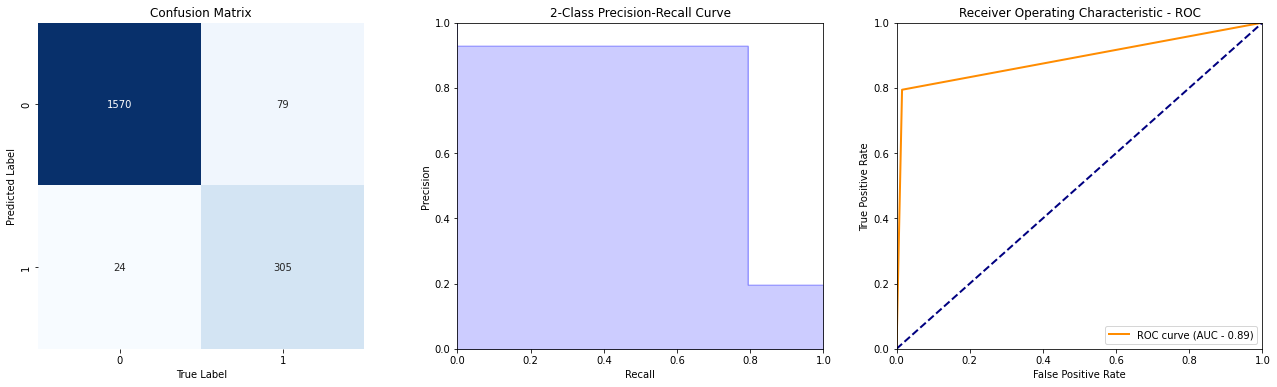

In [43]:
# Show show summary report based on train dataset ---
show_summary_report(y_train, y_train_pred) # (actual, prediction)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(rep_x, rep_y, test_size=0.20, random_state=77)

In [45]:
LR_model = LogisticRegression(solver='lbfgs')
fit = LR_model.fit(X_train, y_train)

In [46]:
y_train_pred = LR_model.predict(X_train)

Accuracy : 0.9601 [TP / N]      Best: 1, Worst: 0
           Proportion of Predicted Labels that match the True Labels.
Precision: 0.9751 [TP / (TP + FP)] Best:1, Worst: 0
           Not to Label a negative sample as positive.
Recall   : 0.8151 [TP / (TP + FN)] Best:1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.9050 [TP / (TP + FN)] Best:1, Worst: < 0.5
= 80
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of Samples
F1 Score : 0.8879 [F1 Score = 2 X (Precision X Recall) / (Precision + Recall)]        Best: 1, Worst: 0


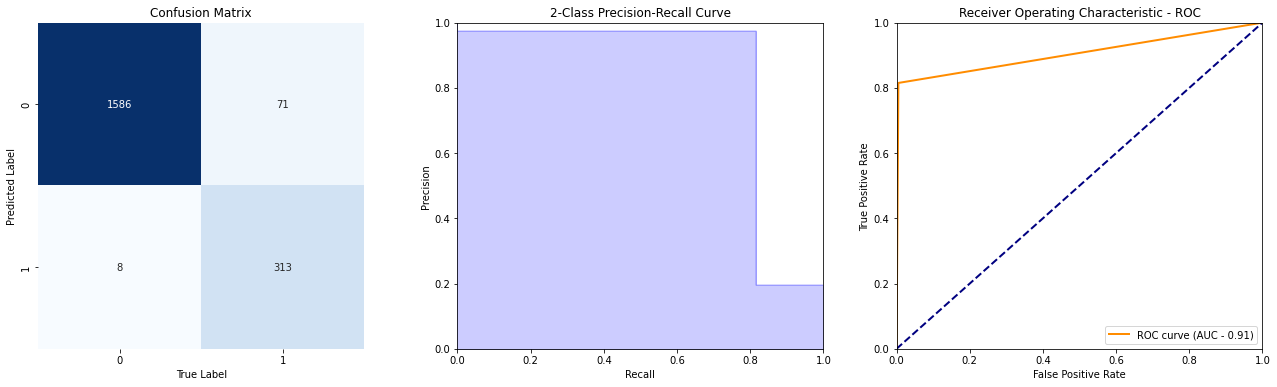

In [47]:
# Show show summary report based on train dataset ---
show_summary_report(y_train, y_train_pred) # (actual, prediction)